# Linear Regression 

Linear regression model are good for regression tasks. We are familiar with the simplest form of  linear regression (drawing a straight line) but we can use this model for far more complex stuffs and data points.

In this section we are going to deal with intutive talks about the maths behind linear regression and how a linear model can be generalized for complex data.

In [1]:
# some basic imports 
%matplotlib inline
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns; sns.set()

import numpy as np # for matrix maths

# Simple Linear Regression 

We will start with one of the most basic linear regression which is fitting a stratight line of the form $y = ax + b$.

Where $a$ is *slope* of the line, and $b$ is considered as *intercept* of the line.

Consider the following data with the slope of *2* and intercept of *-5*:

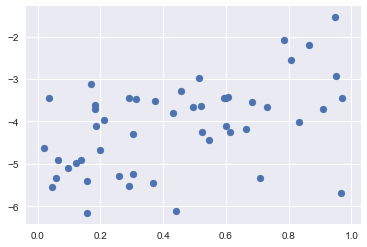

In [2]:
# setting a range
rng = np.random.RandomState(42)

# x values 
x = rng.rand(50)

# y values 
y = 2 * x -5 + rng.randn(50)

# plotting the scatter 
plt.scatter(x,y);

We can use *Scikit-learn's* `LinearRegression` estimator to fit this data and construct the best fit.

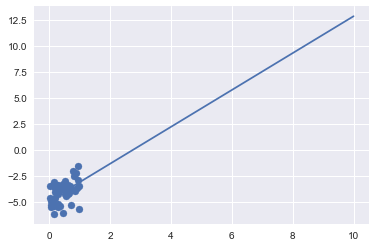

In [3]:
# importing linear regression 
from sklearn.linear_model import LinearRegression

# modelling an object of LR 
model = LinearRegression(fit_intercept=True)

# fitting the model 
model.fit(x[:,np.newaxis],y)

# making a test data set 
xfit = np.linspace(0,10,100)

# predicting for xfit
yfit = model.predict(xfit[:,np.newaxis])

# plotting the graph
plt.scatter(x,y) # scatter plot
plt.plot(xfit,yfit); # line plot

The slope and intercept of the model are:

In [4]:
print("The slope is",model.coef_[0])
print("The intercept is ",model.intercept_)

The slope is 1.7765660038531037
The intercept is  -4.903310725531113


The `LinearRegression` model is much more capable of this, however-in adition to simple straight-lines fits, it can also handle multidimensional linear model of the form:

$$ y = a_0x_0 + a_1x_1 + a_2x_2 + a_3x_3 + ... $$

Where there are multiple values $x$ we can fit a hyper-plane or consider a plane in three-dimesion

The multidimensional data is hard to visualize, but we can fit that data easily, for example:

In [5]:
# making a 3-d data 
X = 10 * rng.rand(100,3)

# target data 
y = 0.5 + np.dot(X,[1.5, -2., 1.])

# fitting model 
model.fit(X,y)

print("Intercept",model.intercept_)
print("Coefficients", model.coef_)

Intercept 0.49999999999999556
Coefficients [ 1.5 -2.   1. ]


Here $y$ data is constructed from three $x$ values, and the linear regression recovers the coefficient used to construct data 


In this way we can use single `LinearRegression` estimator to fit the lines, planes and hyper-planes. It still appears that only data having linear relationship and we are limited to this part. 

# Basis Function Regression

One trick that you can use to adapt linear regression to non linear relationships between variables is to transform the data according to *basis function*. We can use this using `PolynomialRegression` pipeline as seen in previous modules 

For example if $f_n(x) = x^n$, our model becomes a polynomial regression:

$$y = a_0 + a_1x^1 + a_2x^2 + a_3x^3 + .... $$
    
Notice that it is still this linear model- the linearity refers to the fact that the coeficients $a_n$ never multiplies or divide each other. What we have effectively done is taken our onen dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

## Polynomial Basis Function 

The polynomial projection is often used to fit more complicated relationships and its built in in *scikit-learn*, we can use `PolynomialFeatures` from it.

In [6]:
# importing polynomial features 
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2 , 3 , 4 ])

poly = PolynomialFeatures(degree=3, include_bias=False)

poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Here we can see that that our data is been transformed into a three dimensional array from one dimesional array.

We can make a pipeline and then perform polynomial regression on this data now, lets make a 7-degree polynomial model:

In [7]:
# importing a pipeline function 
from sklearn.pipeline import make_pipeline

# making pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

With this transformation we can produce a fit between more complicated fit  betweeen $x$ and $y$. For example here is the sine waves with the noise.

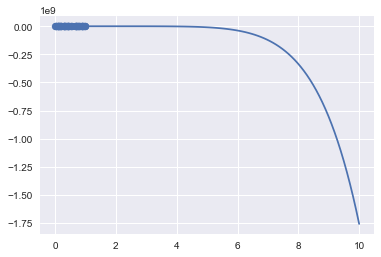

In [8]:
# making a data set 
# setting random state 
rng = np.random.RandomState(1)

x = rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:,np.newaxis], y)

yfit = poly_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y) # scatter plot 
plt.plot(xfit,yfit); # line plot

## Gaussian Basis Function 

Of course, other basis function can also be used. For example one of the method is to use sum of polynomial data and the other one is the use of *Gaussian sum*.

Gaussian function is not built in our *Scikit-learn*  module but we can create our own transformation function can be used to convert data into Gaussian sum and then help us to train and predict our model, as shown in upcoming section:

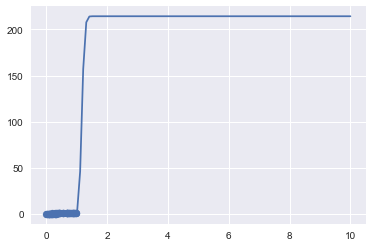

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);